# Perceptrón multicapa

Consideraremos un perceptrón multicapa, con capas enumeradas por $l=0,1,...,L$.
Denotemos por $x^l_i$ el estado de la $i$-ésima neurona en la capa $l$.
Diremos que la red posee $n^l$ neuronas $i=1,...,n^l$ en la $l$-ésima capa.
En particular, $x^0$ denota el vector de estados de la capa de entrada y $x^L$ el vector de estados de la capa de salida.
Se tiene que
\begin{equation}
x^l_i
=
g(h^l_i)
\;\;\;\;\;\;\;\; (1)
\end{equation}
donde $g:\mathbb{R}\to \mathbb{R}$ es una función de activación, por ejemplo una sigmoide $g(h)=1/(1+e^{-h})$, y
\begin{equation}
h^{l}_i
=
\sum_j w^{l}_{ij} x^{l-1}_j
\;\;\;\;\;\;\;\; (2)
\end{equation}
es el campo local sufrido por la $i$-ésima neurona en la $l$-ésima capa .
Además, $w^l_{ij}$ denota la intensidad de la sinapsis que conecta la $j$-ésima neurona en la $(l-1)$-ésima capa con la $i$-ésima neurona en la $l$-ésima capa.
Notar, la red depende de las matrices de pesos sinápticos $w^1,w^2,...,w^{L}$.

## Umbrales de activación

En cada una de las capas $l=0,1,...,L-1$, se agrega una neurona extra $i=n^l+1$ con un estado fijo $x^l_{n^l+1}=-1$.
De esta manera, una nueva sinapsis $u^{l}_i:=w^{l}_{i,n^{l-1}+1}$ hace las veces de umbral de activación de la $i$-ésima neurona en la $l$-ésima capa, ya que
\begin{equation}
h^{l+1}_i
=
w^{l+1}_{i,n^{l}+1} x^{l}_{n^{l}+1}
+
\sum_{j=1}^{n^l} w^{l+1}_{ij} x^{l}_j
=
-
u^{l+1}_i
+
\sum_{j=1}^{n^l} w^{l+1}_{ij} x^l_j
\;\;\;\;\;\;\;\; (3)
\end{equation}

## Conjunto de entrenamiento

Los datos de entrenamiento consisten en un conjunto de pares $\{(e^m,s^m):m=1,...,M\}$ donde $e^m\in \mathbb{R}^{n_0}$ y $s^m\in \mathbb{R}^{n_L}$ son vectores que representan el $m$-ésimo par de entrada-salida o *ejemplo* que debe aprender la red.

## Función costo: el Error Cuadrático

Si pensamos que la salida de la red es una función de la entrada, i.e. que $x^L(x^0)$, podemos evaluar el error que comete la red sobre el conjunto de entramiento utilizando el *error cuadrático*
$$
E
=
\sum_{m=1}^M F^m
$$
como *función costo*, donde
$$
F^m
=
\frac{1}{2}
\sum_{i=1}^{n^L}
(x^L_i(x^0=e^m) - s^m_i)^2
$$
es el error cuadrático que comete la red sobre el $m$-ésimo ejemplo.

## Entrenamiento: descenso por el gradiente

Entrenar la red consisten en encontrar valores de los pesos sinápticos $w^l_{ij}$ que minimicen el error $E$.
Para ello, expresamos el error en función de dichos pesos y calculamos las componentes de su gradiente
$$
\frac{\partial E}{\partial w^l_{ij}}
=
\sum_m
\frac{\partial F^m}{\partial w^l_{ij}}
$$
De esta manera, podemos utilizar el algoritmo de descenso por el gradiente para actualizar los pesos hasta que el error alcance un mínimo global.
Más precisamente, partiendo de valores aleatorios
$(w^l_{ij})^0$ para los pesos sinápticos, actualizamos iterativamente a los mismos con la siguiente regla
\begin{equation}
(w^l_{ij})^{t+1} = (w^l_{ij})^t-\eta \frac{\partial F^m}{\partial w^l_{ij}}((w^l_{ij})^t)
\;\;\;\;\;\;\;\; (4)
\end{equation}
para todo $l$, $ij$ y $m$, donde el parámetro $0<\eta\ll 1$ controla la tasa de aprendizaje.
La iteración se detiene cuando ya no se advierten reducciones significativas del error $E$.

## Cálculo del gradiente del error cuadrático

Con el fin de simplificar la notación, elegimos un valor arbitrario de $m$ y obviamos la dependencia de las expresiones con éste índice.

Notar que los vectores $x^l$ y $h^l$ sólo dependen de las matrices $w^1,...,w^{l}$.
De esta manera, observamos que
\begin{eqnarray}
\frac{\partial x^l_i}{\partial w^r_{pq}}
&=&
g'(h^l_i)
\frac{\partial h^l_i}{\partial w^r_{pq}}
\nonumber
\end{eqnarray}
si $r\leq l$, y
$$
\frac{\partial x^l_i}{\partial w^r_{pq}}=0
$$
en caso contrario.
Por otro lado,
\begin{eqnarray}
\frac{\partial h^{l}_i}{\partial w^r_{pq}}
&=&
\frac{\partial}{\partial w^r_{pq}}
\bigg(
\sum_j w^{l}_{ij} x^{l-1}_j
\bigg)
\nonumber
\\
&=&
\sum_j w^{l}_{ij}
\frac{\partial x^{l-1}_j}{\partial w^r_{pq}}
\nonumber
\end{eqnarray}
si $r<l$, y
$$
\frac{\partial h^l_i}{\partial w^{l}_{pq}}
=
\sum_j
\delta_{ip}
\delta_{jq}
x^{l-1}_j
=
\delta_{ip}
x^{l-1}_q
$$
Con estas ecuaciones se pueden establecer una relación de recurrencia que nos permite calcular las componentes del gradiente de $F$.
A saber
\begin{eqnarray}
\frac{\partial F}{\partial w^r_{pq}}
&=&
\sum_i (x^L_i-s_i)
\frac{\partial x^L}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_i (x^L_i-s_i)
g'(h^L_i)
\frac{\partial h^L_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_i
D^L_i
\frac{\partial h^L_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_i
D^L_i
\sum_j
w^L_{ij}
\frac{\partial x^{L-1}_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_i
D^L_i
\sum_j
w^L_{ij}
g'(h^{L-1}_j)
\frac{\partial h^{L-1}_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_j
\bigg(
g'(h^{L-1}_j)
\sum_i
w^L_{ij}
D^L_i
\bigg)
\frac{\partial h^{L-1}_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_j
D^{L-1}_j
\frac{\partial h^{L-1}_i}{\partial w^r_{pq}}
\nonumber
\end{eqnarray}
donde
\begin{equation}
D^L_i:=(x^L_i-s_i)g'(h^L_i)
\;\;\;\;\;\;\;\; (5)
\end{equation}
y
$$
D^{L-1}_j
:=
g'(h^{L-1}_j)
\sum_i
w^L_{ij}
D^L_i
$$
representan los *errores locales* de la $i$-ésima neurona en la $L$-ésima capa y la $j$-ésima neurona en la $(L-1)$-ésima capa, respectivamente.

El anterior procedimiento puede continuarse capa por capa, con cada capa $l$ tal que $r<l$, de manera que
\begin{eqnarray}
\frac{\partial F}{\partial w^r_{pq}}
&=&
\sum_j D_j^l
\frac{\partial h^l_j}{\partial w^r_{pq}}
\nonumber
\end{eqnarray}
donde
\begin{equation}
D_j^l
:=
g'(h^{l}_j)
\sum_i w^{l+1}_{ij}D_i^{l+1}
\;\;\;\;\;\;\;\; (6)
\end{equation}
hasta que eventualmente se alcanza la capa $l=r$, y se obtiene
\begin{eqnarray}
\frac{\partial F}{\partial w^r_{pq}}
&=&
\sum_j
D_j^{r}
\frac{\partial h^{r}_j}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_j
D_j^{r}
\delta_{jp}
x^{r-1}_q
\nonumber
\\
&=&
D_p^{r}
x^{r-1}_q
\nonumber
\end{eqnarray}
En particular, este último resultado se verifica para el caso $r=L$ de $pq$ arbitrario.
También se verifica para el caso en que $q=n^{r-1}+1$ y valores arbitrarios de $r$ y $p$, en donde $x_q^{r-1}=-1$ corresponde al estado fijo de la neurona en la capa $(r-1)$-ésima que permite simular la acción de umbrales en la capa $r$-ésima, tal como se describe en la Ec. 3.

## El algoritmo de backpropagation

Los resultados anteriores pueden condensarse en el llamado *algoritmo de backpropagation*, el cuál permite el cálculo del gradiente y la actualización de los pesos sinápticos, y consiste en la siguiente lista de pasos.
Para cada ejemplo $m=1,...,M$, ejecutar:
1. *Forward pass:* calcular la salida $x^L$ de la red ante la entrada $x^1=e^m$ utilizando las Ecs. 1 y 2. En el proceso, guardar los valores de activación $x^l$ y de los correspondientes campos locales $h^l$ obtenidos en las distintas capas $l=2,...,L$, ya que serán útiles más adelante.
2. Calcular el vector de errores $D^L$ de la capa de salida utilizando la Ec. 5.
3. Propagar los errores hacia atrás, i.e. calcular los errores $D^l$ para $l=L-1,L-2,...,1$ utilizando la Ec. 6.
4. Para cada $l$, $i$ y $j$, calcular el gradiente $\frac{\partial F^m}{\partial w^l_{ij}}$ utilizando la Ec. 7 y actualizar el correspondiente peso sináptico $w^l_{ij}$ utilizando la Ec. 4.

## **Ejercicio 1**

Genere un conjunto de entrenamiento compuesto por $M=\sum_c m_c$ puntos en $\mathbb{R}^{n_e}$ distribuidos en $n_s$ nubes de $m_c$ puntos.

Para generar las nubes:

* genere aleatoriamente $n_s$ puntos en $\mathbb{R}^{n_e}$ a los que llamaremos centros, sorteando los valores de las coordenadas a partir de una distribución normal, y

* para cada centro $c$, genere $m_c$ puntos aleatorios alrededor del mismo, sumando sus coordenadas a números aleatorios generados con una Gaussiana de varianza $\sigma^2$.

Las $n_e$ coordenadas del $m$-ésimo punto constituirán el vector de entrada del $m$-ésimo ejemplo.
La nube a la que pertenece el $m$-ésimo punto determinará el vector de salida del $m$-ésimo ejemplo.
Más precisamente, si el $m$-ésimo punto pertenence a la $c$-ésima nube, el vector de salida será el vector canónico $(0,0,...,1,...,0)$ de $n_s$ componentes con un único 1 en la $c$-esima posición.

Concretamente

1. Genere un conjunto de 8 puntos en $\mathbb{R}^{n_e}$ con $n_e=2$, divididos en 3 nubes con $m_1=3$ en la primera nube, $m_2=2$ puntos en la segunda nube y $m_3=3$ puntos en la tercera nube. Utilice $\sigma=0.1$ para indicar la dispersión de los puntos alrededor de cada nube.

2. Grafique las nubes de puntos, utilizando un color distinto para cada una de ellas.

## **Ejercicio 2**

1. Implemente un **perceptrón multicapa** con $n_e=2$ neuronas de entrada, una capa oculta de $n_o=2$ neuronas, y una capa de salida de $n_s=3$ neuronas. Recuerde, además, agregar las neuroas auxiliares que se utiliza para imitar los umbrales de activación. Utilice funciones de activación **sigmoideas**.

2. Entrenelo sobre el conjunto de ejemplos generado en el Ejercicio 1. Para entrenarlo, utilice una tasa $\eta=0.02$ y alrededor de 10.000 de épocas o más, según considere necesario.

3. Grafique el error $E$ en función del número de épocas de entrenamiento.

4. Luego, grafique nuevamente los puntos del Ejercicio 1, pintando el relleno de los mismos con los colores correspondiente a cada nube, y el borde de los mismos con el color correspondiente a la predicción obtenida con el **perceptrón multicapa**. Coinciden las predicciones con los colores originales?

5. Repita los experimentos con funciones de activación **ReLUs**. Que ocurre?

## **Ejercicio 3: la compuerta XOR**

1. Fabrique un dataset con el siguiente conjunto de 4 ejemplos:

    * $e_1 = (0,0)$, $s_1=(1,0)$
    * $e_2 = (0,1)$, $s_2=(0,1)$
    * $e_3 = (1,0)$, $s_3=(0,1)$
    * $e_4 = (1,1)$, $s_4=(1,0)$
    
  corresponde a la compuerta XOR.

2. Es el **perceptrón multicapa** capáz de aprender la compuerta XOR? Para responder esta pregunta, genere un **perceptrón multicapa** con $n_e=2$ neuronas de entrada, $n_o=2$ neuronas ocultas y $n_s=2$ neuronas de salida, y entrénelo utilizando el conjunto de ejemplos de la compuerta XOR.

3. Como se compara el **perceptrón multicapa** con el **perceptrón monocapa** sobre la compuerta XOR? Para responder esta otra pregunta, genere otro perceptrón "multicapa", pero esta vez utilizando solo dos capas, una de entrada con $n_e=2$ neuronas y una de salida con $n_s=2$ neuronas (de manera tal que en realidad es un perceptron monocapa), y repita el experimento anterior con los ejemplos de la compuerta XOR.

4. Repita los experimentos con funciones de activación **ReLUs**. Que ocurre?

In [535]:
# 1.1)

import random
import numpy as np
import matplotlib.pyplot as plt
import math

def puntos_aleatorios(n=3):
    return [np.array([random.uniform(-10, 10), random.uniform(-10, 10)]) for _ in range(n)]

num_puntos = [3,2,3]

puntos = puntos_aleatorios()

grupos = [[], [], []]

for i in range(3):
    for _ in range(num_puntos[i]):
        grupos[i].append(puntos[i] + np.array(np.random.normal(0, 0.3, 2)))


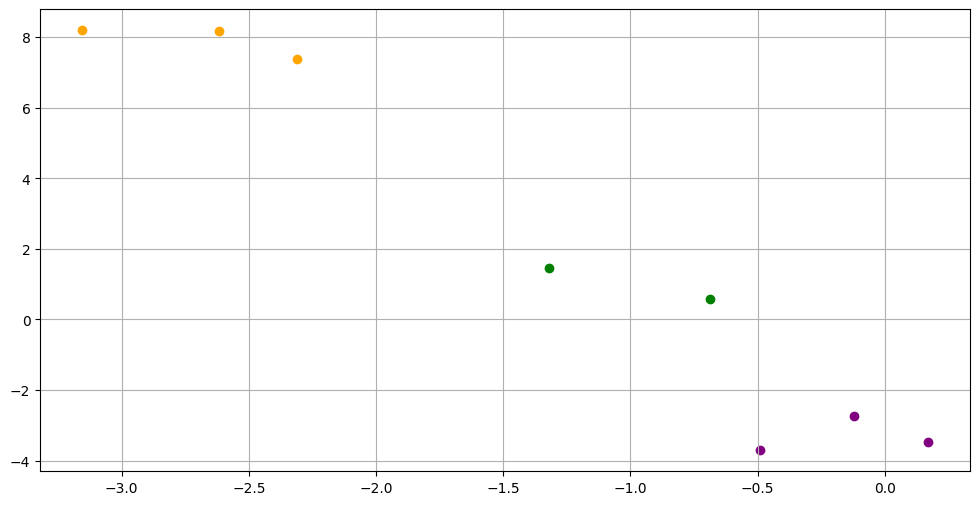

In [536]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

plt.scatter(*zip(*grupos[0]), color='purple', marker='o')
plt.scatter(*zip(*grupos[1]), color='green', marker='o')
plt.scatter(*zip(*grupos[2]), color='orange', marker='o')

plt.grid()

plt.show()

In [537]:
data = np.array([coord for group in grupos for coord in group]).T

data

array([[ 0.16943891, -0.12210515, -0.4886081 , -0.68732313, -1.32104289,
        -2.30926718, -2.61820134, -3.15420476],
       [-3.47897744, -2.74588753, -3.70718293,  0.59034762,  1.46159332,
         7.36952846,  8.16605184,  8.19383841]])

In [538]:
def generate_labes(num_points):

    filas = len(num_points)
    columnas = sum(num_points)
    
    matriz = np.zeros((filas, columnas), dtype=int)
    
    col_inicio = 0
    for i, num in enumerate(num_points):
        matriz[i, col_inicio:col_inicio + num] = 1
        col_inicio += num
    
    return matriz

labels = generate_labes(num_points=num_puntos)

In [539]:
def random_weights_gen(layers):
    matrices = []
    for i in range(len(layers) - 1):
        filas = layers[i+1] + 1
        columnas = layers[i] + 1
        matriz = np.random.rand(filas, columnas)
        matrices.append(matriz)
    return matrices

data = np.array([coord for group in grupos for coord in group]).T

In [540]:
Ws_prueba = [np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]]),
             np.array([[1, 1, 1, 1],
                       [1, 1, 1, 1],])]

layers_prueba = [2,3,2]
entry_prueba = [1,2]

# Ws_prueba = random_weights_gen(layers_prueba)

def multi_layer_perceptron(entry, 
                           layers, 
                           Ws,
                           act_fct = lambda x: x):

    Ws_copy = Ws.copy()
    layers_values = [np.array(entry).copy()]
    hs = []
    for k in range(len(layers) - 1):

        layers_values[k] = np.append(layers_values[k], -1)

        output = np.zeros(layers[k+1])
        h = np.zeros(layers[k+1])
        for j in range(layers[k+1]):
            for i in range(layers[k] + 1):
                output[j] += Ws_copy[k][j,i] * layers_values[k][i]
            h[j] = output[j]
            output[j] = act_fct(h[j])
        hs.append(h)
        layers_values.append(output.copy())

    return layers_values, hs

In [541]:
result = multi_layer_perceptron(entry=entry_prueba,
                                layers=layers_prueba,
                                Ws=Ws_prueba)[0]
result[-1]

array([5., 5.])

In [ ]:
def backpropagation(Ws, 
                    layers,
                    data, 
                    labels, 
                    learning_rate,
                    act_fct=lambda x: x, 
                    d_act_fct=lambda x: 1):

    Ws_copy = Ws.copy()

    for m in range(labels.shape[1]): #labeled examples

        layers_values, hs = multi_layer_perceptron(entry=data[:, m], 
                                                   layers=layers, 
                                                   Ws=Ws_copy, 
                                                   act_fct=act_fct)


        D = np.zeros(len(layers_values[-1]))
        for i in range(len(layers_values[-1])):
            D[i] += (layers_values[-1][i] - labels[i, m]) * d_act_fct(hs[-1][i])
        
        D_ls = [D.copy()]
        for i in range(1, len(layers_values) - 1):
            D = np.zeros(len(layers_values[-i-1]))
            for j in range(len(layers_values[-i-1]) - 1):

                D[j] += d_act_fct(hs[-i-1][j]) * D_ls[-i] @ Ws[-i][:,-i]
            
            D_ls.append(D.copy())
        
        D_ls = D_ls[::-1]

        print(len(layers_values))
        print(len(D_ls))
        print(len(Ws_copy))
        for l in range(1,len(layers_values)):
            for i in range(len(layers_values[l])):
                for j in range(len(layers_values[l+1])-1):
                    Ws_copy[l-1][j,i] -= learning_rate * D_ls[l-1][j] * layers_values[l][i] ##Creo que aca esta el error, en los indices

    return Ws_copy
    

In [543]:
W = backpropagation(Ws=Ws_prueba,
                    data=data,
                    layers=layers_prueba,
                    labels=labels,
                    learning_rate=0.02)

3
2
2


IndexError: index 3 is out of bounds for axis 1 with size 3